In [1]:
from core.activations import Fun
from core.losses import LossFun
from core.mlp import MLP

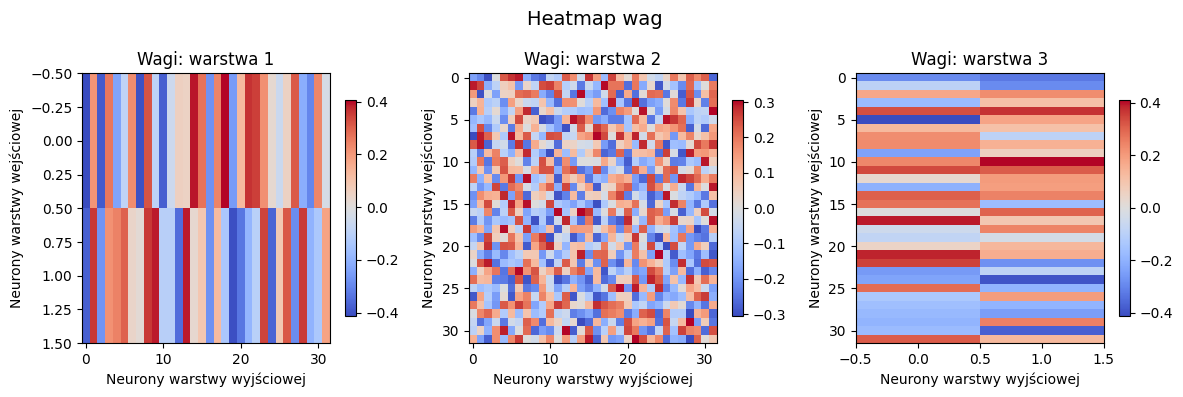

Epoka 500/5000, błąd treningowy: 0.129602, walidacyjny: 0.164522
Epoka 1000/5000, błąd treningowy: 0.076533, walidacyjny: 0.129577
Epoka 1500/5000, błąd treningowy: 0.067925, walidacyjny: 0.122839
Epoka 2000/5000, błąd treningowy: 0.064791, walidacyjny: 0.118942
Epoka 2500/5000, błąd treningowy: 0.062550, walidacyjny: 0.115381
Epoka 3000/5000, błąd treningowy: 0.060639, walidacyjny: 0.112289
Epoka 3500/5000, błąd treningowy: 0.058881, walidacyjny: 0.110080
Epoka 4000/5000, błąd treningowy: 0.057253, walidacyjny: 0.108728
Epoka 4500/5000, błąd treningowy: 0.055643, walidacyjny: 0.107408
Epoka 5000/5000, błąd treningowy: 0.054105, walidacyjny: 0.106019


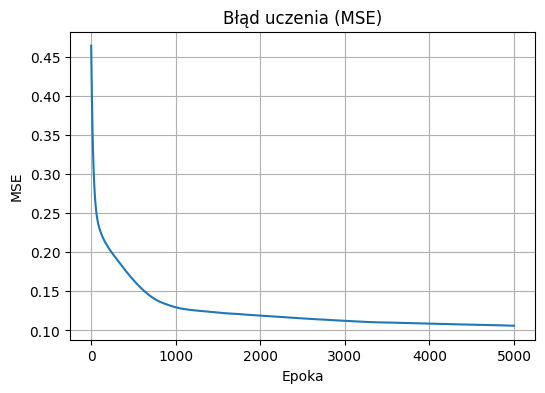

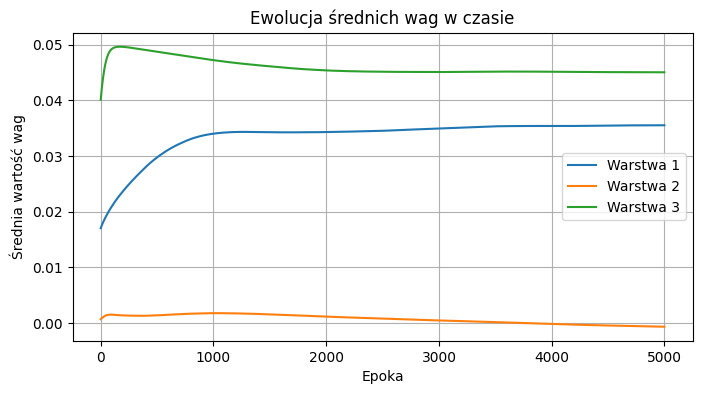

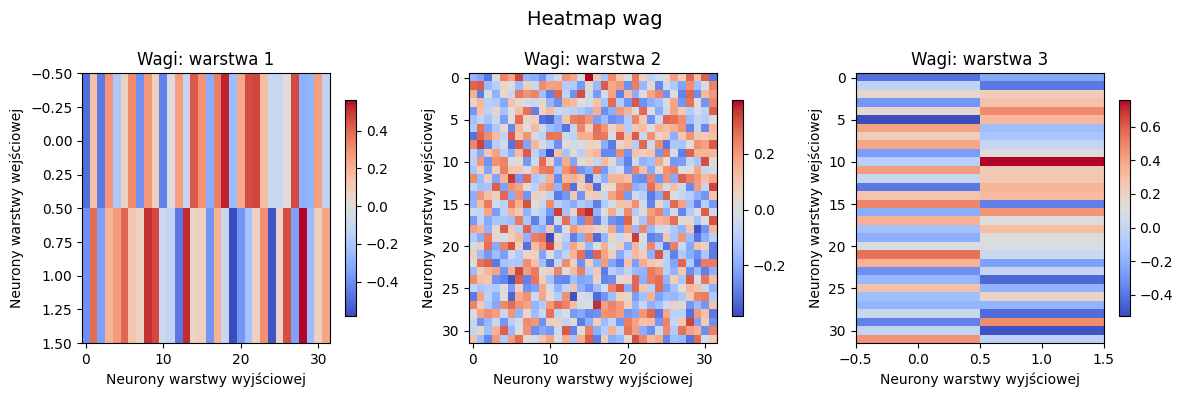

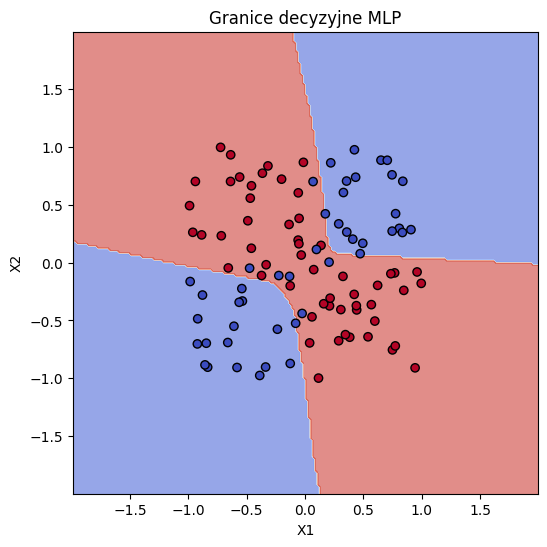

In [2]:
from plots.loss import make_loss_plot
from plots.classification.boundary import plot_decision_boundary
from data.classification import get_classification_data, Size, ClassificationType
from plots.weights import make_weights_avg_plot, make_weights_heatmap
from utils.split import split_data


X, y = get_classification_data(
    class_type=ClassificationType.NOISY_XOR, class_size=Size._100
)
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)

layer_sizes = [2, 32, 32, y.shape[1]]
activations = [Fun.ReLU, Fun.ReLU, Fun.Linear]
mlp = MLP(layer_sizes, activations, loss_fun=LossFun.MSE)

make_weights_heatmap(mlp)
weights_before = mlp.layers[0].W.copy()

epochs = 5000
learning_rate = 0.01
train_loss, val_loss, weights = mlp.train(X_train, y_train, X_val, y_val, epochs=epochs, learning_rate=learning_rate)

weights_after = mlp.layers[0].W.copy()

make_loss_plot(val_loss)
make_weights_avg_plot(weights)
make_weights_heatmap(mlp)

plot_decision_boundary(mlp, X, y)

Epoka 500/5000, błąd treningowy: 0.329442, walidacyjny: 0.283563
Epoka 1000/5000, błąd treningowy: 0.288869, walidacyjny: 0.263518
Epoka 1500/5000, błąd treningowy: 0.256234, walidacyjny: 0.241354
Epoka 2000/5000, błąd treningowy: 0.202142, walidacyjny: 0.178829
Epoka 2500/5000, błąd treningowy: 0.153644, walidacyjny: 0.141788
Epoka 3000/5000, błąd treningowy: 0.108780, walidacyjny: 0.090268
Epoka 3500/5000, błąd treningowy: 0.084298, walidacyjny: 0.062873
Epoka 4000/5000, błąd treningowy: 0.072232, walidacyjny: 0.049752
Epoka 4500/5000, błąd treningowy: 0.055848, walidacyjny: 0.042088
Epoka 5000/5000, błąd treningowy: 0.044055, walidacyjny: 0.038722


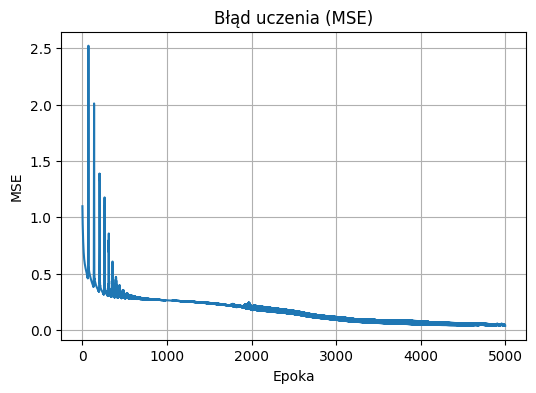

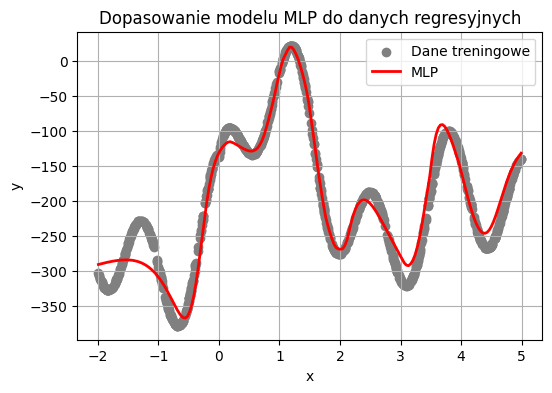

In [3]:
from data.regression import get_regression_data, Size, RegressionType
from utils.normalize import normalize
from plots.loss import make_loss_plot
from plots.regression.fit import make_fit_plot

X, Y = get_regression_data(class_type=RegressionType.MULTIMODAL, class_size=Size._1000)

Xn, X_mean, X_std = normalize(X)
Yn, Y_mean, Y_std = normalize(Y)
X_train, y_train, X_val, y_val, X_test, y_test = split_data(Xn, Yn)

layer_sizes = [1, 64, 64, 32, 1]
activations = [Fun.ReLU, Fun.Tanh, Fun.Tanh, Fun.Linear]
mlp = MLP(layer_sizes, activations, loss_fun=LossFun.MSE)

epochs = 5000
learning_rate = 0.1
train_loss, val_loss, weights = mlp.train(X_train, y_train, X_val, y_val, epochs=epochs, learning_rate=learning_rate)

make_loss_plot(val_loss)
# make_weights_plot(weight_history)

make_fit_plot(X, Y, mlp)